In [1]:
# In this assignment students have to make ARIMA model over shampoo sales data and
# check the MSE between predicted and actual value.

# Student can download data in .csv format from the following link:
# https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

# Hint: Following is the command import packages and data
#     from pandas import read_csv
#     from pandas import datetime
#     from matplotlib import pyplot
#     from statsmodels.tsa.arima_model import ARIMA
#     from sklearn.metrics import mean_squared_error
#     def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
#     series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,
#     squeeze=True, date_parser=parser)

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('sales-of-Shampoo.csv')

# Understand Dataset and Data

In [3]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.tail()

,Month,Sales of shampoo over a three year period
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9
36,Sales of shampoo over a three year period,NaN


In [5]:
df = df.iloc[0:df.shape[0]-1,:]

In [6]:
df.tail()

,Month,Sales of shampoo over a three year period
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [7]:
df['Month'] = '190' + df['Month']
df.head()

,Month,Sales of shampoo over a three year period
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3


In [8]:
df.Month = pd.to_datetime(df.Month,format ='%Y-%m')
df.head()

,Month,Sales of shampoo over a three year period
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [10]:
df.rename(mapper={'Sales of shampoo over a three year period': 'Shampoo Sales'},axis =1,inplace = True)
df.head()

,Month,Shampoo Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [11]:
series =  df['Shampoo Sales']

In [12]:
series.head()

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Shampoo Sales, dtype: float64

# Creating a time series of  Shampoo Sales data with Month as Index

In [13]:
series.index = df.Month
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Shampoo Sales, dtype: float64

In [14]:
series.describe(include ='all')

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Shampoo Sales, dtype: float64

In [15]:
series.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

# Plotting the time series chart of Shampoo Sales

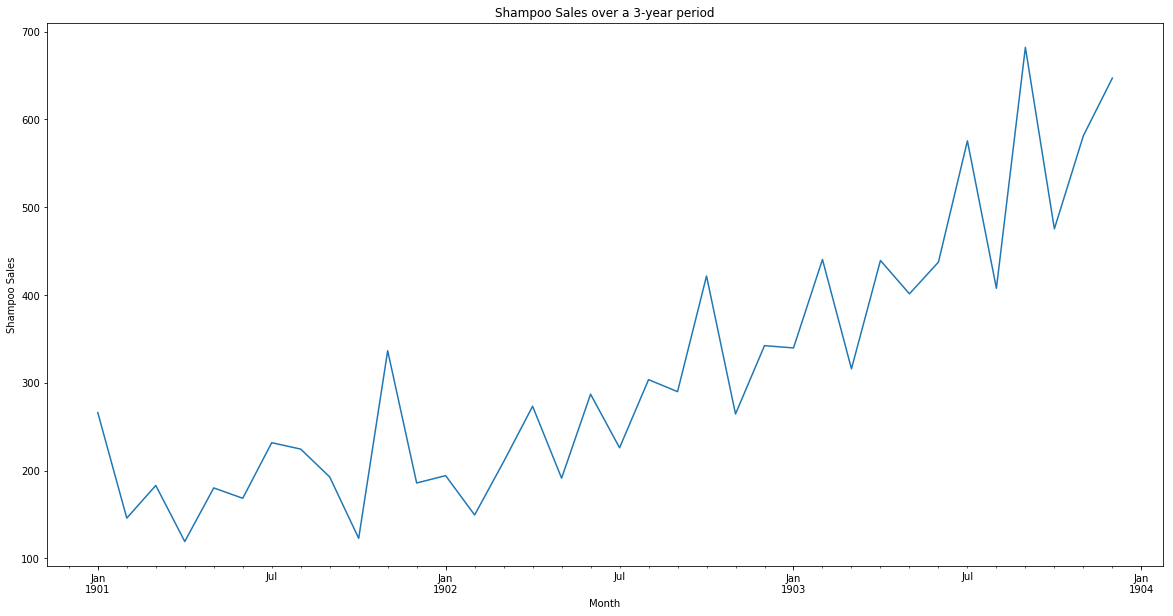

In [16]:
plt.figure(figsize = (20,10))
plt.title('Shampoo Sales over a 3-year period')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales')
series.plot()

# Analysis of Shampoo Sales Time-Series using HP-Filter

In [17]:
sales_cycle, sales_trend = sm.tsa.filters.hpfilter(series)

In [18]:
sales_cycle.head()

Month
1901-01-01    105.794569
1901-02-01    -18.081282
1901-03-01     15.276745
1901-04-01    -52.486170
1901-05-01      4.365604
Name: Shampoo Sales, dtype: float64

In [19]:
sales_trend.head()

Month
1901-01-01    160.205431
1901-02-01    163.981282
1901-03-01    167.823255
1901-04-01    171.786170
1901-05-01    175.934396
Name: Shampoo Sales, dtype: float64

In [20]:
sales_df = pd.DataFrame(data = series.values, index = series.index,columns = ['Sales'])
sales_df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [21]:
sales_df['Trend'] = sales_trend

In [22]:
sales_df['Cycle'] = sales_cycle

In [23]:
sales_df.head()

,Sales,Trend,Cycle
Month,,,
1901-01-01,266.0,160.205431,105.794569
1901-02-01,145.9,163.981282,-18.081282
1901-03-01,183.1,167.823255,15.276745
1901-04-01,119.3,171.786170,-52.486170
1901-05-01,180.3,175.934396,4.365604


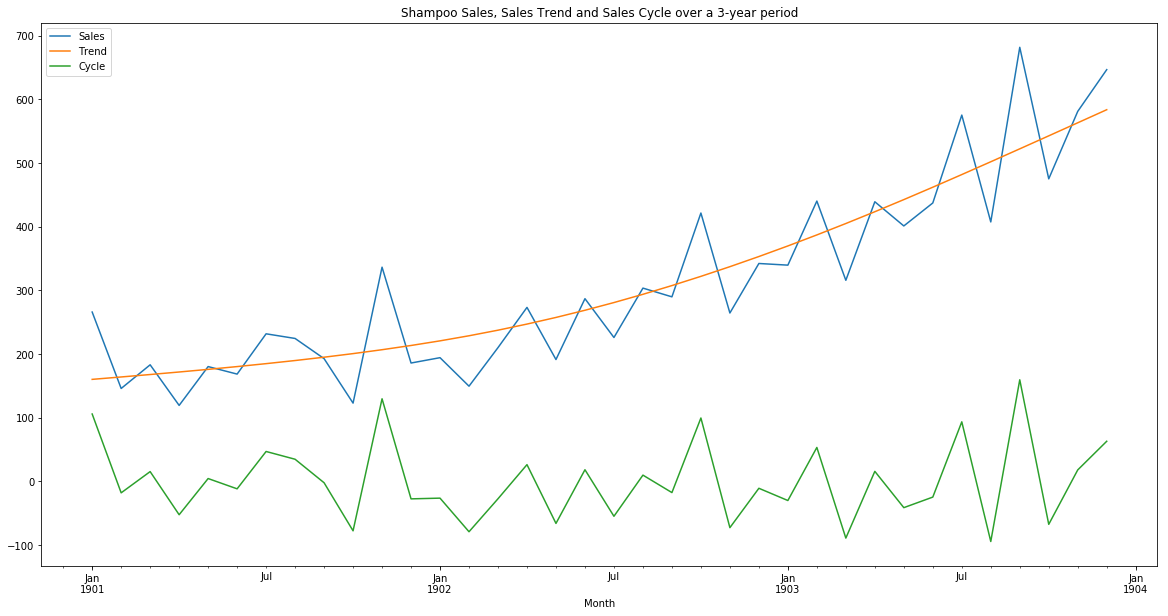

In [24]:
sales_df.plot(title ='Shampoo Sales, Sales Trend and Sales Cycle over a 3-year period',figsize = (20,10))

In [26]:
series.index = pd.to_datetime(series.index)

# EWMA( Exponentially Weighted Moving Average)

In [25]:
ewma_df = pd.DataFrame({'Actual Series':series, 'EWMA Series':series.ewm(span = 3).mean()})

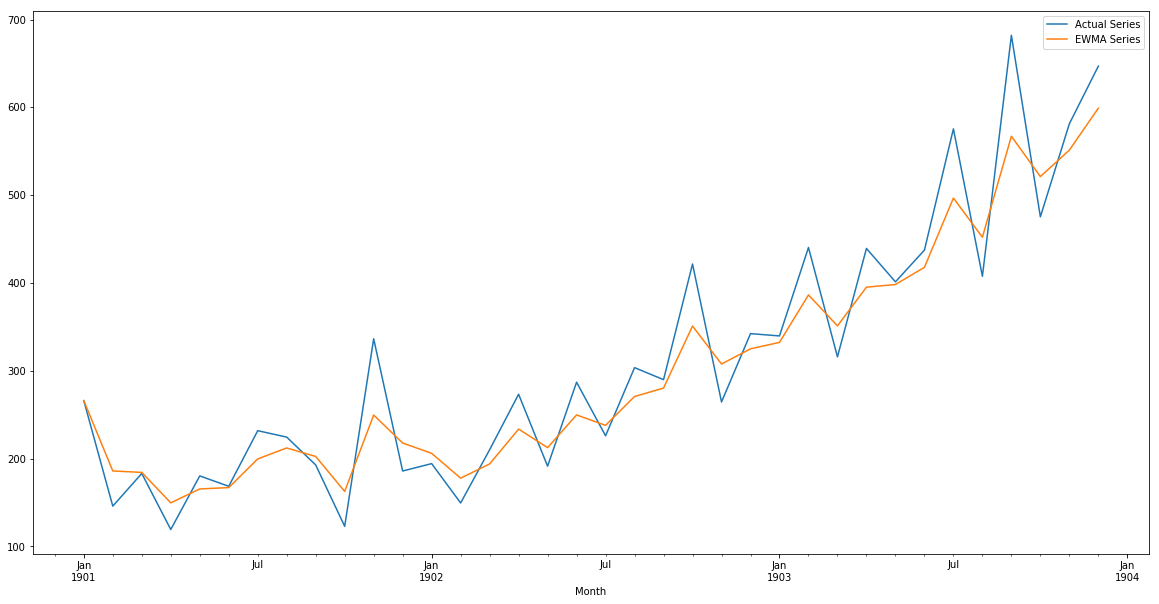

In [26]:
ewma_df.plot(figsize = (20,10))

# Analysis of series to use ARIMA Model(p,d,q) 

## Plotting rolling mean and standard deviation along with actual data


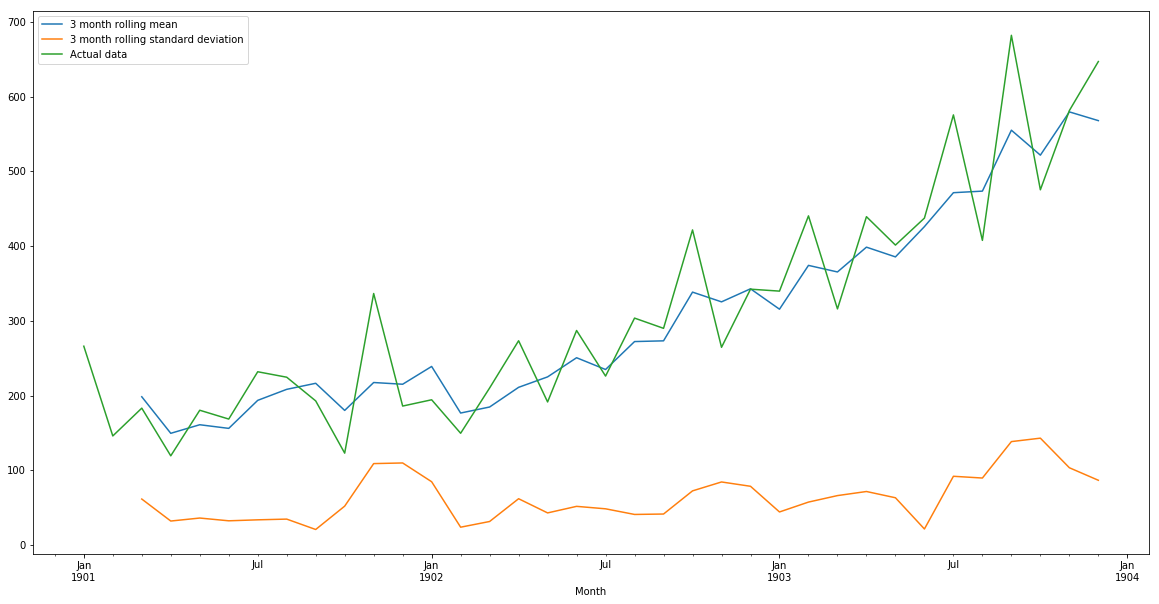

In [27]:
series.rolling(3).mean().plot(label = '3 month rolling mean', figsize = (20,10))
series.rolling(3).std().plot(label = '3 month rolling standard deviation', figsize = (20,10))
series.plot(label = 'Actual data')
plt.legend()

## Decomposing the series using ETS

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
ets_result = seasonal_decompose(series)

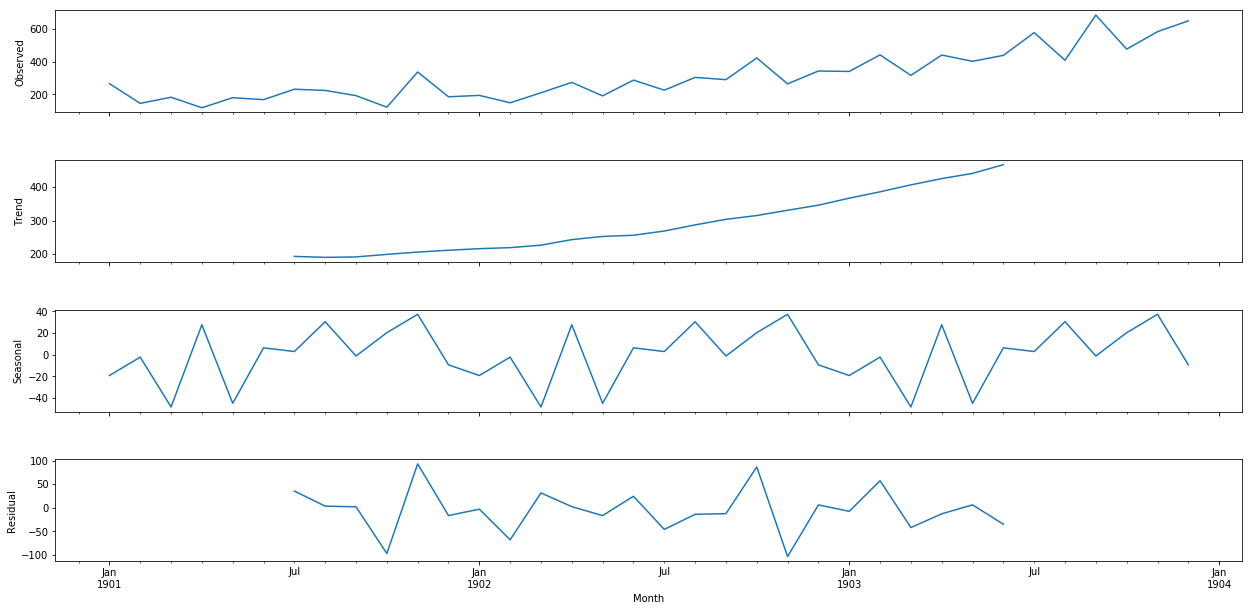

In [31]:
ets_result_fig = ets_result.plot()
ets_result_fig.set_size_inches(20,10)

In [32]:
ets_result_df = pd.DataFrame({'Trend': ets_result.trend, 'Seasonality': ets_result.seasonal,
                              'Residual': ets_result.resid,'Observed':ets_result.observed})

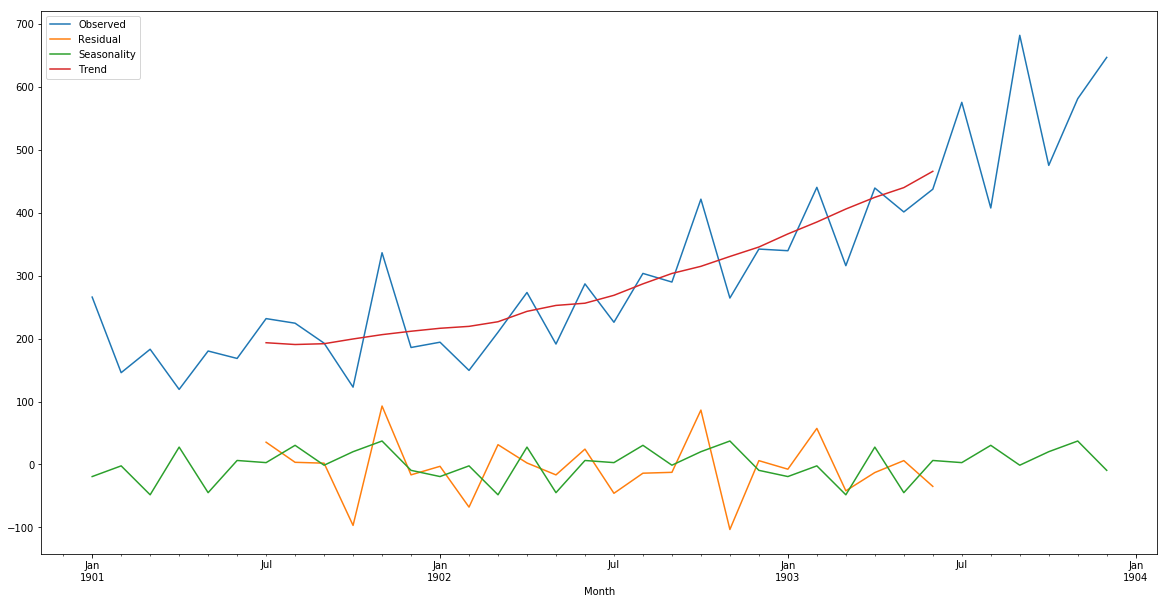

In [33]:
ets_result_df.plot(figsize=(20,10))

## Checking the stationarity of the time series data (Using Augmented Dickey - Fuller Unit Root Test 

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
def adf_check(time_series):
    adfuller_result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(adfuller_result, labels):
        print(label + ": " + str(value))
    return adfuller_result

In [41]:
def find_stationarity_and_difference(time_series):
    
    for i in range(0,10):
        
        if(i==0):
            print('Actual Time Series')
        else:
            print(str(i)+'-Differenced Time Series')
            
        print('-' * 60)

        p_stationarity = adf_check(time_series)[1]   
        
        print("\nStationarity:")
        
        if(p_stationarity <= 0.05):
            print( p_stationarity)
            print('Data is Stationary')
            break
        else:
            print('Data is Non-Stationary\n')
            time_series = (time_series - time_series.shift(1)).dropna(axis=0)
    return i, time_series

In [42]:
d,stationary_series = find_stationarity_and_difference(series)

Actual Time Series
------------------------------------------------------------
Augmented Dickey-Fuller Test:
ADF Test Statistic: 3.060142083641181
p-value: 1.0
#Lags Used: 10
Number of Observations Used: 25

Stationarity:
Data is Non-Stationary

1-Differenced Time Series
------------------------------------------------------------
Augmented Dickey-Fuller Test:
ADF Test Statistic: -7.249074055553854
p-value: 1.7998574141687034e-10
#Lags Used: 1
Number of Observations Used: 33

Stationarity:
1.7998574141687034e-10
Data is Stationary


No.of times differenced =  1
Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Freq: MS, Name: Shampoo Sales, dtype: float64


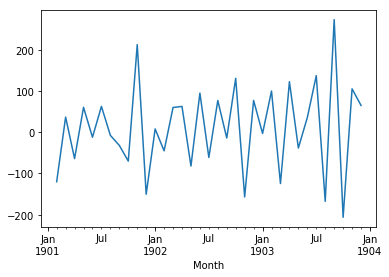

In [57]:
print('No.of times differenced = ', d)
print(stationary_series)
stationary_series.plot()

In [44]:
sm.stats.durbin_watson(series)

0.09548538187456361

In [45]:
sm.stats.durbin_watson(stationary_series)

3.3569486471992795

## Plotting Autocorrelation and Partial Autocorrelation Plots

### Autocorrelation Plot using Pandas

In [46]:
from pandas.tools.plotting import autocorrelation_plot

C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


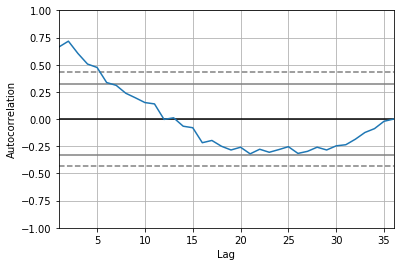

In [48]:
autocorrelation_plot(series)

In [81]:
from statsmodels.tsa.stattools import acf, pacf

In [83]:
lag_acf = acf(stationary_series, nlags=20)
lag_pacf = pacf(stationary_series, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

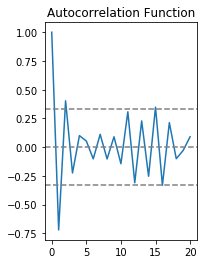

In [84]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stationary_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(stationary_series)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

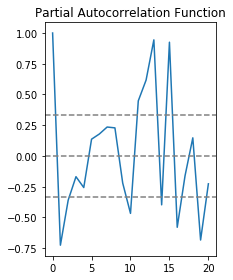

In [85]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stationary_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(stationary_series)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Autocorrelation and Partial Autocorrelation Plot

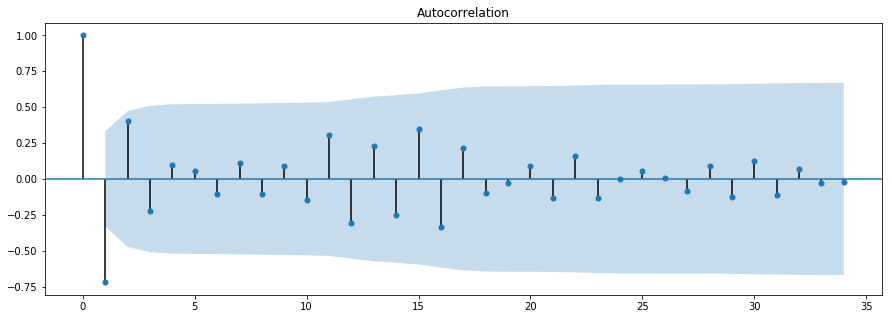

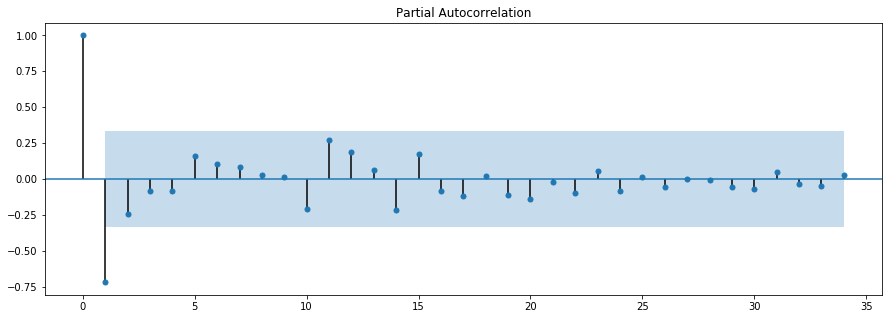

In [55]:
fig_first_acf = plot_acf(stationary_series)
#fig_first_acf = plot_pacf(stationary_series)
fig_first_acf.set_size_inches(15,5)

fig_first_pacf = plot_pacf(stationary_series)
fig_first_pacf.set_size_inches(15,5)

***We can see in the Autocorrelation Plot, that there is sharp drop in the correlation after 2 lags.Therefore, we can choose, q = 2***

***We can see in the Partial Autocorrelation Plot, that there is sharp positive drop in the correlation at 5th lag.Therefore, we can choose,AR-k(k=5) for the autoregression model, i.e. we choose p = 5***

In [59]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(series,order =(5,1,2)) 
arima_results = model.fit()
print(arima_results.summary())

C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:        D.Shampoo Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -191.363
Method:                       css-mle   S.D. of innovations             51.424
Date:                Sat, 06 Oct 2018   AIC                            400.726
Time:                        13:09:31   BIC                            414.724
Sample:                    02-01-1901   HQIC                           405.558
                         - 12-01-1903                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.6068      4.350      2.669      0.013       3.082      20.132
ar.L1.D.Shampoo Sales    -0.3162      0.207     -1.530      0.138      -0.721       0.089
ar.L2.D.

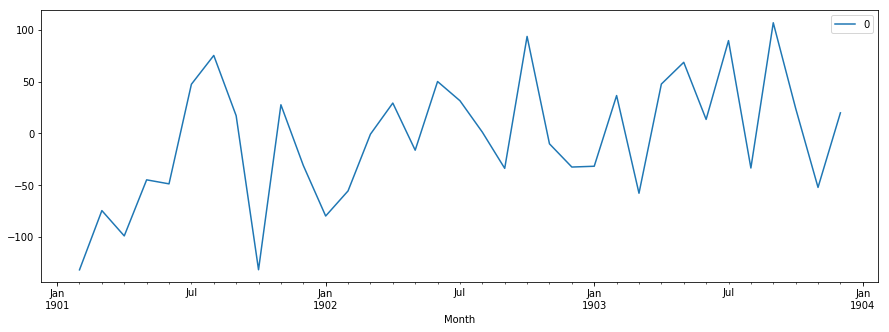

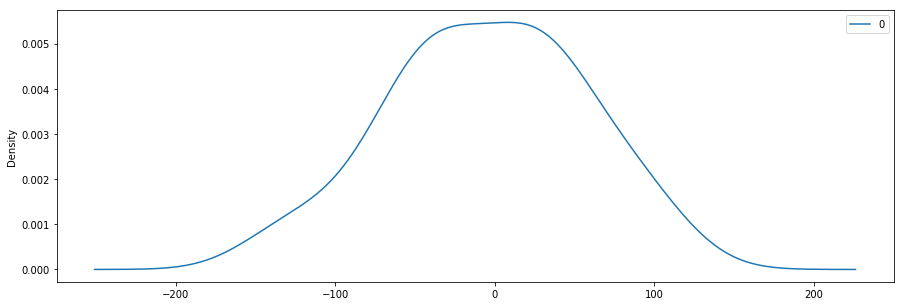

In [62]:
residuals = pd.DataFrame(arima_results.resid)
residuals.plot(figsize=(15,5))
residuals.plot(kind='kde',figsize=(15,5) )

In [63]:
residuals.describe()

,0
count,35.000000
mean,-5.243893
std,60.783088
min,-131.706835
25%,-46.738215
50%,-0.735861
75%,34.085516
max,106.873895


In [64]:
arima_results.aic

400.72582106179993

C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


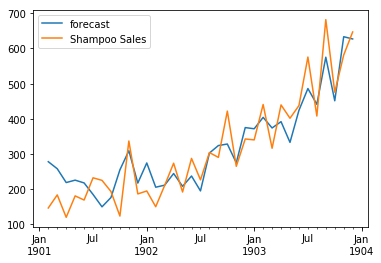

In [65]:
predicted_plot = arima_results.plot_predict()

In [51]:
# Removable!!! YOu can remove the the following part.. Not needed. Only for research

C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=399.145037, expected=342.300000
predicted=354.296561, expected=339.700000
predicted=429.967835, expected=440.400000
predicted=392.634668, expected=315.900000
predicted=420.191746, expected=439.300000
predicted=397.585361, expected=401.300000
predicted=487.892617, expected=437.400000
predicted=434.160085, expected=575.500000
predicted=467.057893, expected=407.600000
predicted=568.083184, expected=682.000000
predicted=468.024696, expected=475.300000
predicted=687.491645, expected=581.300000
predicted=617.839278, expected=646.900000
MSE: 4694.8662


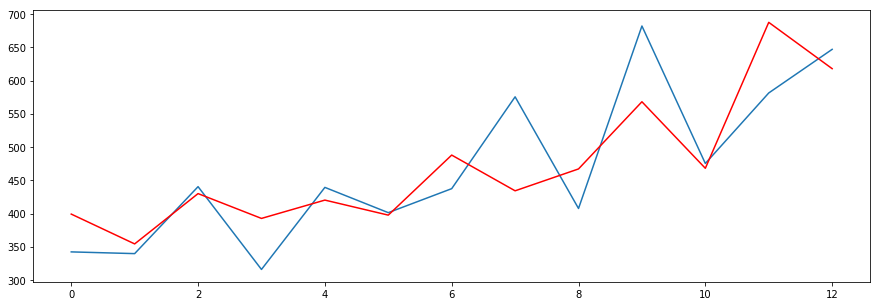

In [78]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('MSE: %.4f' % error)
# plot
plt.figure(figsize=(15,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Forecast using ARIMA 

C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float`

predicted=337.635815, expected=342.300000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=339.700000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=440.400000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=315.900000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=439.300000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=401.300000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=437.400000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=575.500000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=407.600000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=682.000000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=475.300000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=581.300000


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=337.635815, expected=646.900000
Test MSE: 29956.124
Model aic score 256.4535726293434 
Model bic score 266.2729547095683


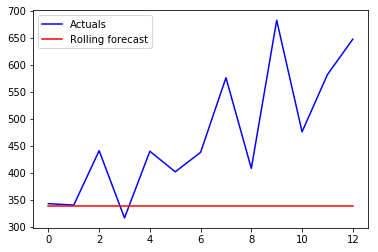

In [80]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order=(5,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

print ("Model aic score",model_fit.aic, "\nModel bic score", model_fit.bic)

# plot
plt.plot(test,color='blue', label='Actuals')
plt.plot(predictions, color='red', label='Rolling forecast' )
plt.legend()
plt.show()

***There is a problem with our forecast, as our rolling forecast is just a horizontal straight line. Therefore, try various values of p,q and select the model which gives the lowest AIC score***

## Trying to find p,q values (d =1) that give lowest AIC score

In [54]:
ararray = X

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(6):
    for q in range(4):
            try:
                model = ARIMA(ararray, (p,d,q)).fit()
                x = model.aic
                x1 = (p,d,q)

                print (x1, x)
                aic.append(x)
                pdq.append(x1)
            except:
                pass

keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

(0, 1, 0) 430.87311187552797
(0, 1, 1) 409.0126622411773
(1, 1, 0) 406.02228959235015
(1, 1, 1) 402.4666524180001
(1, 1, 2) 401.5247943797664
(1, 1, 3) 403.52417287501396
(2, 1, 0) 403.6275641166603
(2, 1, 1) 404.28621423318384
(3, 1, 0) 404.6924591816536
(3, 1, 1) 406.1395443929499
(4, 1, 0) 404.78676855670926
(4, 1, 1) 406.5796403612153
(4, 1, 2) 400.2307795387977
(4, 1, 3) 400.6567725868804
(5, 1, 0) 406.33987702440857


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 1, 1) 416.03570427283387
(5, 1, 2) 400.7258210618472


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(5, 1, 3) 402.4996309748759
Best Model is : (4, 1, 2)


***The model gives error for the values (5,1,2) and other subsequent values of p,d,q. But works for (p,d,q) = (5,1,0)***

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


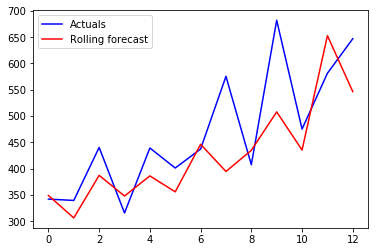

In [56]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test,color='blue', label='Actuals')
plt.plot(predictions, color='red', label='Rolling forecast' )
plt.legend()
plt.show()

In [57]:
print('The model has the parameters: (p,d,q) = (5,1,0). Its an autoregressive model')

The model has the parameters: (p,d,q) = (5,1,0). Its an autoregressive model
